In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install torch transformers datasets
!pip install accelerate>=0.20.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 49.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 50.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 19.3 MB/s eta 0:00:00


In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForQuestionAnswering, TrainingArguments, Trainer
from datasets import load_dataset

# Load the SQuAD dataset

squad_dataset=load_dataset("squad")

# Keywords to filter
keywords = ['health',"medicine","medical", 'Anatomy', 'Physiology', 'Pathology', 'Pharmacology', 'Microbiology', 'Immunology', 'Biochemistry', 'Cardiology', 'Dermatology', 'Gastroenterology',
    'Neurology', 'Oncology', 'Radiology', 'Pediatrics', 'Obstetrics', 'Gynecology', 'Orthopedics', 'Ophthalmology', 'Pulmonology', 'Urology',
    'Nephrology', 'Hematology', 'Endocrinology', 'Allergy', 'Psychiatry', 'Genetics', 'Epidemiology', 'Virology', 'Neurosurgery', 'PlasticSurgery',
    'EmergencyMedicine', 'FamilyMedicine', 'InternalMedicine', 'Geriatrics', 'Anesthesiology', 'Dentistry', 'Pharmacy', 'MedicalImaging',
    'MedicalLaboratory', 'Rehabilitation', 'Biotechnology', 'Bioinformatics', 'MedicalEthics', 'PainManagement', 'CriticalCare', 'PalliativeCare',
    'Diabetes', 'Cancer', 'HeartDisease', 'Stroke', 'HIV/AIDS', 'Alzheimer\'sDisease', 'Arthritis', 'Asthma', 'Obesity', 'Depression', 'Schizophrenia',
    'Autism', 'Epilepsy', 'Parkinson\'sDisease', 'Tuberculosis', 'Malaria', 'Hepatitis', 'DiabetesMellitus', 'Hypertension', 'Influenza', 'Ebola',
    'Antibiotics', 'Vaccines', 'MedicalDevices', 'ClinicalTrials', 'ElectronicHealthRecords', 'Telemedicine', 'MedicalEducation', 'MedicalResearch',
    'PublicHealth', 'HealthPolicy', 'GlobalHealth', 'HealthcareFinancing', 'HealthcareAdministration', 'PatientSafety', 'MedicalEthics',
    'HealthInformatics', 'RehabilitationMedicine', 'SportsMedicine', 'OccupationalMedicine', 'ForensicMedicine', 'AlternativeMedicine',
    'TraditionalChineseMedicine', 'Ayurveda', 'Chiropractic', 'Naturopathy', 'Homeopathy', 'HerbalMedicine', 'IntegrativeMedicine',
    'NutritionalMedicine', 'PainManagement', 'SleepMedicine', 'Radiography', 'HealthInsurance', 'PhysicalTherapy', 'OccupationalTherapy',
    'SpeechTherapy', 'MedicalCoding', 'MedicalBilling', 'MedicalTranscription', 'MedicalTerminology', 'HealthcareQuality', 'HealthcareTechnology',
    'HealthDataAnalysis', 'DataPrivacyandSecurity', 'ArtificialIntelligenceinHealthcare', 'MachineLearninginMedicine',
    'NaturalLanguageProcessinginHealthcare', 'BigDatainHealth', 'MedicalRobotics', 'PrecisionMedicine', 'HealthcareAnalytics',
    'HealthcareManagement', 'HealthEconomics', 'MedicalLaw', 'HealthPsychology', 'MentalHealth', 'CommunityHealth', 'Gerontology',
    'HealthPromotion', 'HealthEducation', 'PublicHealthInterventions', 'HealthBehavior', 'HealthCommunication', 'HealthDisparities',
    'EnvironmentalHealth', 'OccupationalHealth', 'IndustrialHygiene', 'InfectiousDiseases', 'GlobalDiseaseOutbreaks', 'MaternalHealth',
    'ChildHealth', 'AdolescentHealth', 'AgingandGeriatricCare', 'HealthcareAccess', 'HealthcareDisparities', 'HealthcareEquity',
    'HealthcareDeliverySystems', 'HealthcareReform', 'HealthcareLegislation', 'HealthTechnologyAssessment', 'HealthRiskAssessment',
    'HealthImpactAssessment', 'HealthMonitoring', 'HealthSurveillance', 'HealthInformatics', 'HealthDataScience', 'HealthDataVisualization',
    'HealthcareDecisionSupportSystems', 'ElectronicMedicalRecords', 'MedicalImageProcessing', 'MedicalSignalProcessing',
    'ClinicalDecisionSupportSystems', 'MedicalDeviceDevelopment', 'HealthcareInformationSystems', 'HealthcareInteroperability',
    'DataMininginHealthcare', 'HealthcarePredictiveAnalytics', 'HealthcareWorkflowOptimization', 'HealthcareSystemIntegration',
    'MobileHealth', 'Telehealth', 'RemotePatientMonitoring', 'DigitalHealth', 'HealthcareApplicationsDevelopment',
    'HealthcareSoftwareEngineering', 'HealthcareUserExperience', 'HealthcareUserInterface', 'PatientEngagement',
    'HealthcareGamification', 'HealthcareMobileApplications', 'HealthcareDataPrivacy', 'HealthcareDataSecurity',
    'Fever', 'Cough', 'Headache', 'SoreThroat', 'RunnyNose', 'Nausea', 'Vomiting', 'Diarrhea', 'Fatigue', 'Rash', 'Allergies',
    'Asthma', 'Bronchitis', 'Pneumonia', 'Influenza', 'CommonCold', 'Sinusitis', 'StomachAche', 'Indigestion', 'Heartburn',
    'Constipation', 'BackPain', 'MusclePain', 'JointPain', 'Arthritis', 'Osteoporosis', 'Anemia', 'Thyroid', 'Menopause',
    'Acne', 'Eczema', 'Psoriasis', 'Migraine', 'Insomnia', 'Depression', 'Anxiety',  'Diabetes', 'Hypertension',
    'Cholesterol', 'HeartDisease', 'Obesity', 'Cancer', 'BreastCancer', 'LungCancer', 'ProstateCancer', 'ColonCancer',
    'SkinCancer', 'Leukemia', 'HIV', 'SexuallyTransmittedInfections', 'UrinaryTractInfection', 'KidneyStones', 'Gallstones',
    'LiverDisease', 'Hepatitis', 'Cirrhosis', 'FoodPoisoning', 'FoodAllergies', 'GlutenIntolerance', 'LactoseIntolerance',
    'Anorexia', 'Bulimia', 'ObstructiveSleepApnea', 'Snoring', 'Osteoarthritis', 'RheumatoidArthritis', 'Gastritis',
    'PepticUlcer', 'Hemorrhoids', 'CarpalTunnelSyndrome', 'Fibromyalgia', 'Endometriosis', 'PremenstrualSyndrome',
    'ErectileDysfunction', 'Infertility', 'Pregnancy', 'Miscarriage', 'Menstruation', 'Contraception', 'BirthControl',
    'PostpartumDepression', 'Breastfeeding', 'ChildhoodVaccinations', 'Autism', 'DownSyndrome', 'Scoliosis', 'Chickenpox',
    'Measles', 'Mumps', 'Rubella', 'WhoopingCough', 'DiaperRash', 'Teething', 'Colic', 'Croup', 'EarInfection', 'StrepThroat',
    'Impetigo', 'Ringworm', 'Pinkeye', 'HeadLice', 'Bedwetting', 'Tonsillitis', 'Conjunctivitis', 'Nosebleed', 'Warts', 'Hives',
    'Sunburn','Fever', 'Cough', 'Headache', 'Sore throat', 'Runny nose', 'Congestion', 'Nausea', 'Vomiting', 'Diarrhea', 'Fatigue',
    'Rash', 'Itching', 'Allergies', 'Asthma', 'Bronchitis', 'Pneumonia', 'Influenza', 'Common cold', 'Sinusitis',
    'Stomach ache', 'Indigestion', 'Heartburn', 'Constipation', 'Diabetes', 'Hypertension', 'High blood pressure', 'Cholesterol',
    'Heart disease', 'Stroke', 'Obesity', 'Arthritis', 'Back pain', 'Joint pain', 'Muscle pain', 'Osteoporosis', 'Gout',
    'Anemia', 'Thyroid', 'Menopause', 'Acne', 'Eczema', 'Psoriasis', 'Dandruff', 'Migraine', 'Insomnia', 'Sleep apnea',
    'Depression', 'Anxiety', 'Bipolar disorder', 'ADHD',
    'Autism spectrum disorder (ASD)', 'Schizophrenia', 'Alzheimer\'s', 'Dementia', 'Parkinson\'s', 'Cancer', 'Breast cancer',
    'Lung cancer', 'Prostate cancer', 'Colon cancer', 'Skin cancer', 'Leukemia', 'HIV/AIDS', 'Sexually transmitted infections (STIs)',
    'Urinary tract infection (UTI)', 'Kidney stones', 'Gallstones', 'Liver disease', 'Hepatitis', 'Cirrhosis', 'Food poisoning',
    'Food allergies', 'Gluten intolerance', 'Lactose intolerance', 'Anorexia', 'Bulimia', 'Obstructive sleep apnea', 'Snoring',
    'Osteoarthritis', 'Rheumatoid arthritis', 'Gastritis', 'Peptic ulcer', 'Hemorrhoids', 'Carpal tunnel syndrome', 'Tennis elbow',
    'Fibromyalgia', 'Endometriosis', 'Polycystic ovary syndrome (PCOS)', 'Erectile dysfunction', 'Premenstrual syndrome (PMS)',
    'Fertility', 'Menstrual cramps', 'Infertility', 'Pregnancy', 'Miscarriage', 'Ectopic pregnancy', 'Menstruation', 'Menopause',
    'Contraception', 'Birth control', 'Morning sickness', 'Prenatal care', 'Postpartum depression', 'Childbirth', 'Breastfeeding',
    'Childhood vaccinations', 'Autism', 'Down syndrome', 'Attention deficit hyperactivity disorder (ADHD)', 'Scoliosis', 'Asthma',
    'Chickenpox', 'Measles', 'Mumps', 'Rubella', 'Whooping cough', 'Hand, foot, and mouth disease', 'Diaper rash', 'Teething',
    'Colic', 'Croup', 'Ear infection', 'Strep throat', 'Fifth disease', 'Impetigo', 'Ringworm', 'Pinkeye', 'Head lice',
    'Bedwetting', 'Thumb sucking', 'Tonsillitis', 'Adenoids', 'Conjunctivitis', 'Nosebleed', 'Warts', 'Hives', 'Sunburn','stress']

s=set(keywords)
keywords=list(s)

# Filter dataset based on keywords
#filtered_dataset = squad_dataset.filter(lambda example: any(keyword in example["question"] for keyword in keywords))
filtered_dataset = squad_dataset.filter(lambda example: any(keyword.lower() in example["question"].lower() for keyword in keywords))
dataset=filtered_dataset


# Load the BioBERT tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("emilyalsentzer/Bio_ClinicalBERT")
model = AutoModelForQuestionAnswering.from_pretrained("emilyalsentzer/Bio_ClinicalBERT")

# Tokenize and preprocess the dataset
def preprocess_function(examples):
    questions = [q.strip() for q in examples["question"]]
    inputs = tokenizer(
        questions,
        examples["context"],
        max_length=384,
        truncation="only_second",
        return_offsets_mapping=True,
        padding="max_length",
    )

    offset_mapping = inputs.pop("offset_mapping")
    answers = examples["answers"]
    start_positions = []
    end_positions = []

    for i, offset in enumerate(offset_mapping):
        answer = answers[i]
        start_char = answer["answer_start"][0]
        end_char = answer["answer_start"][0] + len(answer["text"][0])
        sequence_ids = inputs.sequence_ids(i)

        # Find the start and end of the context
        idx = 0
        while sequence_ids[idx] != 1:
            idx += 1
        context_start = idx
        while sequence_ids[idx] == 1:
            idx += 1
        context_end = idx - 1

        # If the answer is not fully inside the context, label it (0, 0)
        if offset[context_start][0] > end_char or offset[context_end][1] < start_char:
            start_positions.append(0)
            end_positions.append(0)
        else:
            # Otherwise it's the start and end token positions
            idx = context_start
            while idx <= context_end and offset[idx][0] <= start_char:
                idx += 1
            start_positions.append(idx - 1)

            idx = context_end
            while idx >= context_start and offset[idx][1] >= end_char:
                idx -= 1
            end_positions.append(idx + 1)

    inputs["start_positions"] = start_positions
    inputs["end_positions"] = end_positions
    return inputs

dataset = dataset.map(preprocess_function, batched=True)



Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/87599 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10570 [00:00<?, ? examples/s]

Dataset squad downloaded and prepared to /root/.cache/huggingface/datasets/squad/plain_text/1.0.0/d6ec3ceb99ca480ce37cdd35555d6cb2511d223b9150cce08a837ef62ffea453. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

Filter:   0%|          | 0/87599 [00:00<?, ? examples/s]

Filter:   0%|          | 0/10570 [00:00<?, ? examples/s]

Some weights of BertForQuestionAnswering were not initialized from the model checkpoint at emilyalsentzer/Bio_ClinicalBERT and are newly initialized: ['qa_outputs.weight', 'qa_outputs.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/1038 [00:00<?, ? examples/s]

Map:   0%|          | 0/134 [00:00<?, ? examples/s]

In [ ]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.8/19.8 MB 41.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.7/65.7 kB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.0/289.0 kB 32.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 15.2 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of mdit-py-plugins to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 6.7 MB/s eta 0:00:00
   

In [ ]:

import gradio as gr
import torch
from transformers import AutoModelForQuestionAnswering, AutoTokenizer

output_dir = '/content/drive/MyDrive/sambio'
model = AutoModelForQuestionAnswering.from_pretrained(output_dir)
tokenizer = AutoTokenizer.from_pretrained(output_dir)

def predict_answer(question, context):
    inputs = tokenizer.encode_plus(question, context, add_special_tokens=True, return_tensors="pt")
    input_ids = inputs["input_ids"].tolist()
    attention_mask = inputs["attention_mask"].tolist()

    model.eval()
    with torch.no_grad():
        outputs = model(input_ids=torch.tensor(input_ids), attention_mask=torch.tensor(attention_mask))

    start_logits = outputs.start_logits
    end_logits = outputs.end_logits

    all_tokens = tokenizer.convert_ids_to_tokens(input_ids[0])
    answer = tokenizer.convert_tokens_to_string(all_tokens[torch.argmax(start_logits): (torch.argmax(end_logits) + 1)])

    return answer

iface = gr.Interface(
    fn=predict_answer,
    inputs=["text", "text"],
    outputs="text",
    title="Biobert",
    description="Provide a question and context to get the answer.",
    examples=[["What are the symptoms of COVID-19?", "COVID-19 is a viral respiratory illness caused by the SARS-CoV-2 virus. Common symptoms include fever, cough, shortness of breath, fatigue, muscle or body aches, sore throat, loss of taste or smell, headache, congestion, runny nose, nausea or vomiting, and diarrhea. Some individuals may experience severe symptoms such as difficulty breathing, chest pain, confusion, bluish lips or face, and should seek immediate medical attention."],
        ["What is the recommended treatment for diabetes??", "Diabetes is a chronic condition characterized by high blood sugar levels. The treatment for diabetes may include lifestyle modifications such as regular exercise, a balanced diet, weight management, and monitoring blood sugar levels. In some cases, oral medications or insulin injections may be prescribed to help control blood sugar levels. It is important for individuals with diabetes to work closely with their healthcare team to develop an individualized treatment plan"],
        ["What are the symptoms of a stroke?","A stroke occurs when the blood supply to the brain is disrupted, resulting in damage to brain cells. Common symptoms of a stroke include sudden weakness or numbness in the face, arm, or leg (usually on one side of the body), confusion, trouble speaking or understanding speech, difficulty walking, dizziness, severe headache, and loss of coordination. It is important to seek immediate medical attention if someone experiences these symptoms, as prompt treatment can help minimize the damage caused by a stroke."],
        ["What are the different stages of cancer?","Cancer is a disease characterized by the uncontrolled growth of abnormal cells. It typically progresses through several stages, including stage 0 (carcinoma in situ), stage I, stage II, stage III, and stage IV. The stages indicate the extent of cancer spread and help determine the appropriate treatment options. Early-stage cancers are often localized, while advanced stages may involve spread to nearby lymph nodes or distant organs"],
        ["What are the common treatment options for depression?","Depression is a mood disorder characterized by persistent feelings of sadness, loss of interest or pleasure, changes in appetite or sleep patterns, fatigue, and difficulty concentrating. Treatment options for depression may include psychotherapy (such as cognitive-behavioral therapy or interpersonal therapy), medication (such as antidepressants), or a combination of both. Lifestyle changes, such as regular exercise, maintaining a healthy diet, and getting enough sleep, can also be beneficial."]
    ])

iface.launch()


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

In [ ]:

import gradio as gr
import torch
from transformers import AutoModelForQuestionAnswering, AutoTokenizer

output_dir = '/content/drive/MyDrive/samcli'
model = AutoModelForQuestionAnswering.from_pretrained(output_dir)
tokenizer = AutoTokenizer.from_pretrained(output_dir)

def predict_answer(question, context):
    inputs = tokenizer.encode_plus(question, context, add_special_tokens=True, return_tensors="pt")
    input_ids = inputs["input_ids"].tolist()
    attention_mask = inputs["attention_mask"].tolist()

    model.eval()
    with torch.no_grad():
        outputs = model(input_ids=torch.tensor(input_ids), attention_mask=torch.tensor(attention_mask))

    start_logits = outputs.start_logits
    end_logits = outputs.end_logits

    all_tokens = tokenizer.convert_ids_to_tokens(input_ids[0])
    answer = tokenizer.convert_tokens_to_string(all_tokens[torch.argmax(start_logits): (torch.argmax(end_logits) + 1)])

    if(answer!=''):
      return answer
    else:
      return "Oops! Couldn't find answer"

iface = gr.Interface(
    fn=predict_answer,
    inputs=["text", "text"],
    outputs="text",
    title="ClinicalBert",
    description="Provide a question and context to get the answer.",
    examples=[
        ["What are the symptoms of COVID-19?", "COVID-19 is a viral respiratory illness caused by the SARS-CoV-2 virus. Common symptoms include fever, cough, shortness of breath, fatigue, muscle or body aches, sore throat, loss of taste or smell, headache, congestion, runny nose, nausea or vomiting, and diarrhea. Some individuals may experience severe symptoms such as difficulty breathing, chest pain, confusion, bluish lips or face, and should seek immediate medical attention."],
        ["What is the recommended treatment for diabetes??", "Diabetes is a chronic condition characterized by high blood sugar levels. The treatment for diabetes may include lifestyle modifications such as regular exercise, a balanced diet, weight management, and monitoring blood sugar levels. In some cases, oral medications or insulin injections may be prescribed to help control blood sugar levels. It is important for individuals with diabetes to work closely with their healthcare team to develop an individualized treatment plan"],
        ["What are the symptoms of a stroke?","A stroke occurs when the blood supply to the brain is disrupted, resulting in damage to brain cells. Common symptoms of a stroke include sudden weakness or numbness in the face, arm, or leg (usually on one side of the body), confusion, trouble speaking or understanding speech, difficulty walking, dizziness, severe headache, and loss of coordination. It is important to seek immediate medical attention if someone experiences these symptoms, as prompt treatment can help minimize the damage caused by a stroke."],
        ["What are the different stages of cancer?","Cancer is a disease characterized by the uncontrolled growth of abnormal cells. It typically progresses through several stages, including stage 0 (carcinoma in situ), stage I, stage II, stage III, and stage IV. The stages indicate the extent of cancer spread and help determine the appropriate treatment options. Early-stage cancers are often localized, while advanced stages may involve spread to nearby lymph nodes or distant organs"],
        ["What are the common treatment options for depression?","Depression is a mood disorder characterized by persistent feelings of sadness, loss of interest or pleasure, changes in appetite or sleep patterns, fatigue, and difficulty concentrating. Treatment options for depression may include psychotherapy (such as cognitive-behavioral therapy or interpersonal therapy), medication (such as antidepressants), or a combination of both. Lifestyle changes, such as regular exercise, maintaining a healthy diet, and getting enough sleep, can also be beneficial."]
    ]
)

iface.launch()

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

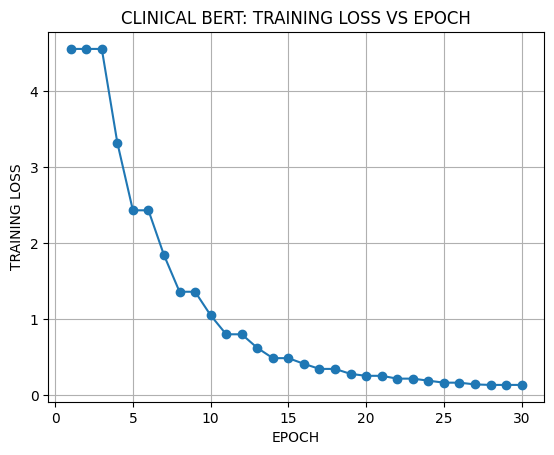

In [ ]:
import matplotlib.pyplot as plt

# Sample data
data = [
    [1, 4.555401],
    [2, 4.555400],
    [3, 4.555400],
    [4, 3.319900],
    [5, 2.431000],
    [6, 2.431000],
    [7, 1.841200],
    [8, 1.359000],
    [9, 1.359000],
    [10, 1.049000],
    [11, 0.799000],
    [12, 0.799000],
    [13, 0.620000],
    [14, 0.484900],
    [15, 0.484900],
    [16, 0.410200],
    [17, 0.343300],
    [18, 0.343300],
    [19, 0.277600],
    [20, 0.252400],
    [21, 0.252400],
    [22, 0.215200],
    [23, 0.215200],
    [24, 0.188600],
    [25, 0.162200],
    [26, 0.162200],
    [27, 0.139200],
    [28, 0.132600],
    [29, 0.132600],
    [30, 0.132500]
]

# Extract the first and second columns
x = [row[0] for row in data]
y = [row[1] for row in data]

# Plot the graph
plt.plot(x, y, marker='o')
plt.xlabel("EPOCH")
plt.ylabel("TRAINING LOSS")
plt.title("CLINICAL BERT: TRAINING LOSS VS EPOCH")
plt.grid(True)
plt.show()

In [ ]:

import gradio as gr
import torch
from transformers import AutoModelForQuestionAnswering, AutoTokenizer,BertForQuestionAnswering

output_dir = '/content/drive/MyDrive/sambert'
model = AutoModelForQuestionAnswering.from_pretrained(output_dir)
tokenizer = AutoTokenizer.from_pretrained(output_dir)

def predict_answer(question, context):


      # Tokenize input
    inputs = tokenizer.encode_plus(question, context, add_special_tokens=True, return_tensors="pt")

  # Retrieve input IDs and attention masks
    input_ids = inputs["input_ids"].tolist()
    attention_mask = inputs["attention_mask"].tolist()
    model.eval()

  # Make the prediction
    with torch.no_grad():
      outputs = model(input_ids=torch.tensor(input_ids), attention_mask=torch.tensor(attention_mask))

  # Get the start and end logits from the model's output
    start_logits = outputs.start_logits
    end_logits = outputs.end_logits

  # Retrieve the predicted answer span
    all_tokens = tokenizer.convert_ids_to_tokens(input_ids[0])
    answer = tokenizer.convert_tokens_to_string(all_tokens[torch.argmax(start_logits) : (torch.argmax(end_logits)+1)])
    if(answer!=''):
      return answer
    else:
      return "Oops! Cannot find answer"

iface = gr.Interface(
    fn=predict_answer,
    inputs=["text", "text"],
    outputs="text",
    title="Bert",
    description="Provide a question and context to get the answer.",
    examples=[
        ["What are the symptoms of COVID-19?", "COVID-19 is a viral respiratory illness caused by the SARS-CoV-2 virus. Common symptoms include fever, cough, shortness of breath, fatigue, muscle or body aches, sore throat, loss of taste or smell, headache, congestion, runny nose, nausea or vomiting, and diarrhea. Some individuals may experience severe symptoms such as difficulty breathing, chest pain, confusion, bluish lips or face, and should seek immediate medical attention."],
        ["What is the recommended treatment for diabetes?", "Diabetes is a chronic condition characterized by high blood sugar levels. The treatment for diabetes may include lifestyle modifications such as regular exercise, a balanced diet, weight management, and monitoring blood sugar levels. In some cases, oral medications or insulin injections may be prescribed to help control blood sugar levels. It is important for individuals with diabetes to work closely with their healthcare team to develop an individualized treatment plan"],
        ["What are the symptoms of a stroke?","A stroke occurs when the blood supply to the brain is disrupted, resulting in damage to brain cells. Common symptoms of a stroke include sudden weakness or numbness in the face, arm, or leg (usually on one side of the body), confusion, trouble speaking or understanding speech, difficulty walking, dizziness, severe headache, and loss of coordination. It is important to seek immediate medical attention if someone experiences these symptoms, as prompt treatment can help minimize the damage caused by a stroke."],
        ["What are the different stages of cancer?","Cancer is a disease characterized by the uncontrolled growth of abnormal cells. It typically progresses through several stages, including stage 0 (carcinoma in situ), stage I, stage II, stage III, and stage IV. The stages indicate the extent of cancer spread and help determine the appropriate treatment options. Early-stage cancers are often localized, while advanced stages may involve spread to nearby lymph nodes or distant organs"],
        ["What are the common treatment options for depression?","Depression is a mood disorder characterized by persistent feelings of sadness, loss of interest or pleasure, changes in appetite or sleep patterns, fatigue, and difficulty concentrating. Treatment options for depression may include psychotherapy (such as cognitive-behavioral therapy or interpersonal therapy), medication (such as antidepressants), or a combination of both. Lifestyle changes, such as regular exercise, maintaining a healthy diet, and getting enough sleep, can also be beneficial."]
    ]
)

iface.launch()

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

In [ ]:

import gradio as gr
import torch
from transformers import AutoModelForQuestionAnswering, AutoTokenizer

output_dir = '/content/drive/MyDrive/samdis'
model = AutoModelForQuestionAnswering.from_pretrained(output_dir)
tokenizer = AutoTokenizer.from_pretrained(output_dir)

def predict_answer(question, context):
    inputs = tokenizer.encode_plus(question, context, add_special_tokens=True, return_tensors="pt")
    input_ids = inputs["input_ids"].tolist()
    attention_mask = inputs["attention_mask"].tolist()

    model.eval()
    with torch.no_grad():
        outputs = model(input_ids=torch.tensor(input_ids), attention_mask=torch.tensor(attention_mask))

    start_logits = outputs.start_logits
    end_logits = outputs.end_logits

    all_tokens = tokenizer.convert_ids_to_tokens(input_ids[0])
    answer = tokenizer.convert_tokens_to_string(all_tokens[torch.argmax(start_logits): (torch.argmax(end_logits) + 1)])

    if(answer!=''):
      return answer
    else:
      return "Oops! Cannot find answer"

iface = gr.Interface(
    fn=predict_answer,
    inputs=["text", "text"],
    outputs="text",
    title="Distilled Bert",
    description="Provide a question and context to get the answer.",
    examples=[
        ["What are the symptoms of COVID-19?", "COVID-19 is a viral respiratory illness caused by the SARS-CoV-2 virus. Common symptoms include fever, cough, shortness of breath, fatigue, muscle or body aches, sore throat, loss of taste or smell, headache, congestion, runny nose, nausea or vomiting, and diarrhea. Some individuals may experience severe symptoms such as difficulty breathing, chest pain, confusion, bluish lips or face, and should seek immediate medical attention."],
        ["What is the recommended treatment for diabetes??", "Diabetes is a chronic condition characterized by high blood sugar levels. The treatment for diabetes may include lifestyle modifications such as regular exercise, a balanced diet, weight management, and monitoring blood sugar levels. In some cases, oral medications or insulin injections may be prescribed to help control blood sugar levels. It is important for individuals with diabetes to work closely with their healthcare team to develop an individualized treatment plan"],
        ["What are the symptoms of a stroke?","A stroke occurs when the blood supply to the brain is disrupted, resulting in damage to brain cells. Common symptoms of a stroke include sudden weakness or numbness in the face, arm, or leg (usually on one side of the body), confusion, trouble speaking or understanding speech, difficulty walking, dizziness, severe headache, and loss of coordination. It is important to seek immediate medical attention if someone experiences these symptoms, as prompt treatment can help minimize the damage caused by a stroke."],
        ["What are the different stages of cancer?","Cancer is a disease characterized by the uncontrolled growth of abnormal cells. It typically progresses through several stages, including stage 0 (carcinoma in situ), stage I, stage II, stage III, and stage IV. The stages indicate the extent of cancer spread and help determine the appropriate treatment options. Early-stage cancers are often localized, while advanced stages may involve spread to nearby lymph nodes or distant organs"],
        ["What are the common treatment options for depression?","Depression is a mood disorder characterized by persistent feelings of sadness, loss of interest or pleasure, changes in appetite or sleep patterns, fatigue, and difficulty concentrating. Treatment options for depression may include psychotherapy (such as cognitive-behavioral therapy or interpersonal therapy), medication (such as antidepressants), or a combination of both. Lifestyle changes, such as regular exercise, maintaining a healthy diet, and getting enough sleep, can also be beneficial."]
    ]
)

iface.launch()

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

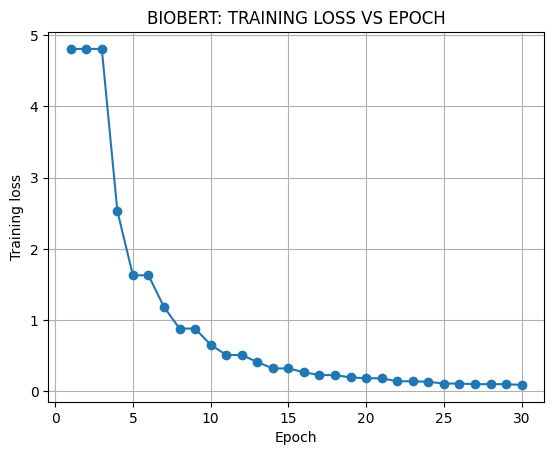

In [ ]:
import matplotlib.pyplot as plt

# Sample data
data = [
    [1, 4.806401],
    [2, 4.806400],
    [3, 4.806400],
    [4, 2.534000],
    [5, 1.629800],
    [6, 1.629800],
    [7, 1.184300],
    [8, 0.882100],
    [9, 0.882100],
    [10, 0.656000],
    [11, 0.511400],
    [12, 0.511400],
    [13, 0.412500],
    [14, 0.323100],
    [15, 0.323100],
    [16, 0.269700],
    [17, 0.229300],
    [18, 0.229300],
    [19, 0.196900],
    [20, 0.184400],
    [21, 0.184400],
    [22, 0.142400],
    [23, 0.142400],
    [24, 0.135300],
    [25, 0.110400],
    [26, 0.110400],
    [27, 0.102300],
    [28, 0.101900],
    [29, 0.101900],
    [30, 0.091300]
]

# Extract the first and second columns
x = [row[0] for row in data]
y = [row[1] for row in data]

# Plot the graph
plt.plot(x, y, marker='o')
plt.xlabel("Epoch")
plt.ylabel("Training loss")
plt.title("BIOBERT: TRAINING LOSS VS EPOCH")
plt.grid(True)
plt.show()

In [ ]:
!pip install sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 10.1 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125926 sha256=e10e4463a08dc95d2186054b09b1296be83a56ca285da40bab0629d7aab1ed55
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [ ]:

from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer
import torch
from transformers import AutoModelForQuestionAnswering, AutoTokenizer,BertForQuestionAnswering
import random


l=[]
cosine_sim_scores = []

x=random.randrange(0,138)
print('x',x)
question = dataset["validation"][x]["question"]
print(question)
context =  dataset["validation"][x]["context"]
print(context)
answer= dataset["validation"][x]["answers"]["text"]


# Initialize the sentence transformer model
sentence_transformer_model = SentenceTransformer("paraphrase-MiniLM-L6-v2")
ground_truth_embedding = sentence_transformer_model.encode([answer])
ground_truth_embedding_2d = ground_truth_embedding.reshape(1, -1)


def predict_answer(question, context,model,tokenizer):


     # Tokenize input
    inputs = tokenizer.encode_plus(question, context, add_special_tokens=True, return_tensors="pt")

  # Retrieve input IDs and attention masks
    input_ids = inputs["input_ids"].tolist()
    attention_mask = inputs["attention_mask"].tolist()
    model.eval()

  # Make the prediction
    with torch.no_grad():
      outputs = model(input_ids=torch.tensor(input_ids), attention_mask=torch.tensor(attention_mask))

  # Get the start and end logits from the model's output
    start_logits = outputs.start_logits
    end_logits = outputs.end_logits

  # Retrieve the predicted answer span
    all_tokens = tokenizer.convert_ids_to_tokens(input_ids[0])
    answer = tokenizer.convert_tokens_to_string(all_tokens[torch.argmax(start_logits) : (torch.argmax(end_logits)+1)])
    return answer



output_dir1 = '/content/drive/MyDrive/samcli'
model1 = AutoModelForQuestionAnswering.from_pretrained(output_dir1)
tokenizer1 = AutoTokenizer.from_pretrained(output_dir1)
a1=predict_answer(question,context,model1,tokenizer1)
if(len(a1)!=0):
  predicted_embedding1 = sentence_transformer_model.encode([a1])
  cosine_sim_scores.append(cosine_similarity(predicted_embedding1, ground_truth_embedding_2d))
  l.append(a1)

print(a1)

output_dir2 = '/content/drive/MyDrive/sambert'
model2 = BertForQuestionAnswering.from_pretrained(output_dir2)
tokenizer2 = AutoTokenizer.from_pretrained(output_dir2)
a2=predict_answer(question,context,model2,tokenizer2)
if(len(a2)!=0):
  predicted_embedding2 = sentence_transformer_model.encode([a2])
  cosine_sim_scores.append(cosine_similarity(predicted_embedding2, ground_truth_embedding_2d))
  l.append(a2)

print(a2)

output_dir3 = '/content/drive/MyDrive/sambio'
model3 = AutoModelForQuestionAnswering.from_pretrained(output_dir3)
tokenizer3 = AutoTokenizer.from_pretrained(output_dir3)
a3=predict_answer(question,context,model3,tokenizer3)
if(len(a3)!=0):
  predicted_embedding3 = sentence_transformer_model.encode([a3])
  cosine_sim_scores.append(cosine_similarity(predicted_embedding3,ground_truth_embedding_2d))
  l.append(a3)

print(a3)

d={}
if len(l)!=0:
  for i in range(len(l)):
    d[l[i]]=cosine_sim_scores[i]
  print(d)
# Initialize the list to store cosine similarity scores
  max1=max(d.values())
  for a in d:
    if d[a]==max1:
      print("Best answer",a)
      break




x 13
The 2012 study showed teachers experienced more stress than whom?
A 2000 study found that 42% of UK teachers experienced occupational stress, twice the figure for the average profession. A 2012 study found that teachers experienced double the rate of anxiety, depression, and stress than average workers.


double the rate of anxiety, depression, and stress than average workers
average workers
double the rate of anxiety, depression, and stress than average workers
{'double the rate of anxiety, depression, and stress than average workers': array([[0.558823]], dtype=float32), 'average workers': array([[0.98467135]], dtype=float32)}
Best answer average workers


In [ ]:
import gradio as gr
import torch
from transformers import AutoModelForQuestionAnswering, AutoTokenizer, BertForQuestionAnswering, BertTokenizer
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer
import random
random_index=0

output_dir1 = '/content/drive/MyDrive/samcli'
model1 = AutoModelForQuestionAnswering.from_pretrained(output_dir1)
tokenizer1 = AutoTokenizer.from_pretrained(output_dir1)

output_dir2 = '/content/drive/MyDrive/sambert'
model2 = BertForQuestionAnswering.from_pretrained(output_dir2)
tokenizer2 = BertTokenizer.from_pretrained(output_dir2)

output_dir3 = '/content/drive/MyDrive/sambio'
model3 = AutoModelForQuestionAnswering.from_pretrained(output_dir3)
tokenizer3 = AutoTokenizer.from_pretrained(output_dir3)




In [ ]:
# Initialize the sentence transformer model
sentence_transformer_model = SentenceTransformer("paraphrase-MiniLM-L6-v2")

def predict_answer(question, context, model, tokenizer):
    inputs = tokenizer.encode_plus(question, context, add_special_tokens=True, return_tensors="pt")
    input_ids = inputs["input_ids"].tolist()
    attention_mask = inputs["attention_mask"].tolist()
    model.eval()
    with torch.no_grad():
        outputs = model(input_ids=torch.tensor(input_ids), attention_mask=torch.tensor(attention_mask))
    start_logits = outputs.start_logits
    end_logits = outputs.end_logits
    all_tokens = tokenizer.convert_ids_to_tokens(input_ids[0])
    answer = tokenizer.convert_tokens_to_string(all_tokens[torch.argmax(start_logits): (torch.argmax(end_logits) + 1)])
    return answer

def get_random_question_context():
    global random_index
    random_index = random.randrange(0,137)
    question = dataset["validation"][104]["question"]
    context = dataset["validation"][104]["context"]
    return [question, context]

def get_best_answer(question, context):
    global random_index
    ground_truth_answer = dataset["validation"][104]["answers"]["text"]
    a1 = predict_answer(question, context, model1, tokenizer1)
    a2 = predict_answer(question, context, model2, tokenizer2)
    a3 = predict_answer(question, context, model3, tokenizer3)

    ground_truth_embedding = sentence_transformer_model.encode([ground_truth_answer])
    ground_truth_embedding_2d = ground_truth_embedding.reshape(1, -1)

    predicted_embedding1 = sentence_transformer_model.encode([a1])
    predicted_embedding2 = sentence_transformer_model.encode([a2])
    predicted_embedding3 = sentence_transformer_model.encode([a3])

    cosine_sim_scores = [
        cosine_similarity(predicted_embedding1, ground_truth_embedding_2d)[0][0],
        cosine_similarity(predicted_embedding2, ground_truth_embedding_2d)[0][0],
        cosine_similarity(predicted_embedding3, ground_truth_embedding_2d)[0][0],
    ]

    answers = [a1, a2, a3]
    modz=["Clinical Bert","Bert","Biobert"]
    best_answer = answers[cosine_sim_scores.index(max(cosine_sim_scores))]+"\t \t \t ANSWER FROM-> "+ str.upper(modz[(cosine_sim_scores.index(max(cosine_sim_scores)))])
    return best_answer

iface = gr.Interface(
    fn=get_best_answer,
    inputs=["text", "text"],
    outputs="text",
    title="Find the Best Answer",
    description="Provide a question and context to get the best answer.",
    examples=[
        get_random_question_context(),

    ]
)

iface.launch()

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>